*Copyright (C) 2023 Intel Corporation*<br>
*SPDX-License-Identifier: BSD-3-Clause*<br>
*See: https://spdx.org/licenses/*

---

# Solving a travelling salesman problem using the Lava QUBO solver
This notebook demonstrates the usage of a Lava-Optimization QUBO solver to solve a travelling salesman problem.

Currently, the solver finds a route connecting way-points without taking the salesman's starting position into account.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lava.lib.optimization.apps.tsp.problems import TravellingSalesmanProblem
from lava.lib.optimization.apps.tsp.solver import TSPConfig, TSPSolver

### Generate problem

In [2]:
all_coords = [(1, 1), (2, 1), (16, 1), (16, 15), (2, 15)]
center_coords = [(1, 1)]
point_coords = [(2, 1), (16, 1), (16, 15), (2, 15)]
tsp_instance = TravellingSalesmanProblem(
    waypt_coords=point_coords, starting_pt=center_coords)

### Visualise the problem

- Blue circle: starting position
- Red triangles: way-points

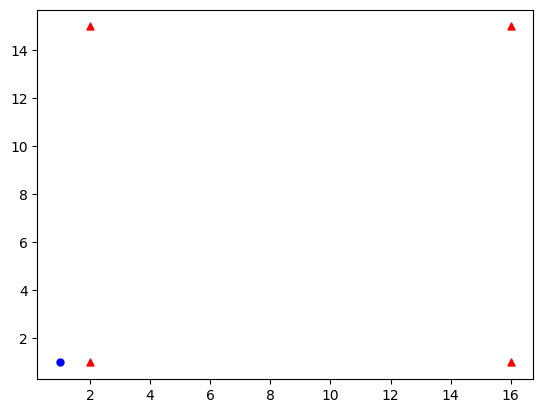

In [3]:
plt.scatter(tsp_instance.nodes[1][0][0], tsp_instance.nodes[1][0][1], s=25, c='b', marker='o')
plt.scatter(np.array(tsp_instance.waypt_coords)[:, 0], np.array(tsp_instance.waypt_coords)[:, 1], s=25, c='r', marker='^')
plt.show()

### Solve

In [4]:
solver = TSPSolver(tsp=tsp_instance)
scfg = TSPConfig(backend="Loihi2",
                 hyperparameters={},
                 target_cost=-1000000,
                 timeout=1000,
                 probe_time=False,
                 log_level=20) # Change log level to 40 for suppressing the verbose output below
np.random.seed(0)
solver.solve(scfg=scfg)

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.54.73.26:37679
INFO:DRV:      Host server up..............Done 0.39s
INFO:DRV:      Mapping chipIds.............Done 0.01ms
INFO:DRV:      Mapping coreIds.............Done 0.05ms
INFO:DRV:      Partitioning neuron groups..Done 0.67ms
INFO:DRV:      Mapping axons...............Done 0.21ms
INFO:DRV:      Configuring Spike Block.....Done 0.00ms
INFO:DRV:      Writes SpikeIO Config to FileDone 0.01ms
INFO:DRV:      Initializes Python MQ.......Done 0.01ms
INFO:DRV:      Partitioning MPDS...........Done 0.46ms
INFO:DRV:      Creating Embedded Snips and ChannelsDone 5.86ms
INFO:DRV:      Compiling Embedded snips....Done 0.80s
INFO:DRV:      Compiling Host snips........Done 0.22ms
INFO:DRV:      Compiling Register Probes...Done 0.35ms
INFO:DRV:      Compiling Spike Probes......Done 0.04ms
INFO:HST:  Args chip=0 cpu=0 /home/sumedhrr/frameworks.ai.nx.nxsdk/nxcore/arch/base/pre_execution/../../../../temp/ecc88876-6956-11ee-bb

In [5]:
print(f"IDs:\n{solver.solution.solution_path_ids}")
print(f"Coords:\n{solver.solution.solution_path_coords}")

IDs:
[4, 3, 2, 5]
Coords:
[(16, 15), (16, 1), (2, 1), (2, 15)]
